In [1]:
from finlab.data import Data

# 可以從 data 中讀取資料
data = Data()

/Users/leonko/Desktop/finlab_course/finlab/data.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = (pd.read_sql(s1, self.conn)
/Users/leonko/Desktop/finlab_course/finlab/data.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = (pd.read_sql(s1, self.conn)


In [4]:
# 從 close, high, low 取從最新的一筆資料往前算，2000筆資料
close = data.get('收盤價', 2000)

high = data.get('最高價', 2000)
low = data.get('最低價', 2000)

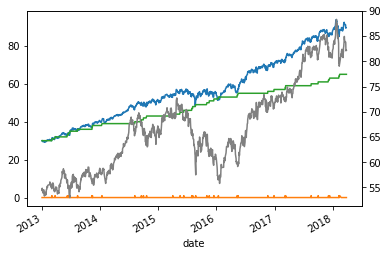

In [18]:
import talib
import pandas as pd

# 利用 talib 來計算 0050 這檔股票的指標
kd = talib.STOCH(hi)
kd = talib.STOCH(high['0050'].ffill().values, 
                 low['0050'].ffill().values, 
                 close['0050'].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1)

# 將 kd 值 分別轉換成 k、d 兩條 series
k = pd.Series(kd[0], index=close['0050'].index)
d = pd.Series(kd[1], index=close['0050'].index)

# & 代表 「且」 的意思，這邊的條件就是
# k.shift(1) 可以想成「昨天」的意思，同理 k.shift(2) 就是前天
# 當（今天的 k > d ）且 （昨天的 k < d） 且 （今天的 k < 30） 時，買入

buy = (k > d) & (k.shift(1) < d.shift(1)) & (k < 30)

# 起始資金為 30 萬，這段可以參考「老師的話」當中的範例
arr = [30]
for v, p in zip(buy[1:], close['0050'].shift(-2)/close['0050'].shift(-1)):
    arr.append(arr[-1]*p + v)


    

# 畫圖
%matplotlib inline

# 先畫出 0050 收盤價
close['0050'].plot(secondary_y=True, color='gray')

# 畫出投資獲利
pd.Series(arr, index=close['0050'].index).plot()

# 畫出買入的時間點
buy.astype(int).plot()

# 畫出一樣的金額假如放在銀行，的資產變化
(buy.astype(int).cumsum() + 30).plot()